# Fixing formatting and removing duplicates

## Objectives

- Correct formatting inconsistencies within the data.
- Identify and remove duplicate records to ensure data integrity.

## Background

This notebook addresses essential data cleaning processes focusing on correcting format inconsistencies and removing duplicate entries within a DataFrame. 

## Datasets Used

The notebook uses a fabricated DataFrame that simulates typical data inconsistencies seen in real-world datasets. This includes irregularities in names, ages, gender identifiers, and scores. The data contains deliberate formatting errors and duplicates to demonstrate cleaning techniques.

## The Data

Data Cleaning includes removing duplicate observations, fixing format errors, typos, incorrect capitalization, etc.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# Creating a dataframe
d = {
    'Name': [' John', 'annA', 'mary', ' mary ', ' AnnA', ' charles', 'John ', ' RoB', 'Rob ', ' john', 'anna ', ' Charles', ' Heather '],
    'Age': [26, 23, 23, 23, 23, 24, 26, 24, 22, 26, 23, 24, 125],
    'Sex': ['MALE', ' female', '_', 'F', ' Fem', 'M', ' male ', ' M  ', ' M', ' Mal', ' Fem', ' male ', ' f '],
    'Score': [85, 31, 55, 55, 31, 77, 85, 63, 63, 85, -1, 77, 80]
}

df = pd.DataFrame(d, columns=['Name', 'Age', 'Sex', 'Score'])
df

,Name,Age,Sex,Score
0,John,26,MALE,85
1,annA,23,female,31
2,mary,23,_,55
3,mary,23,F,55
4,AnnA,23,Fem,31
5,charles,24,M,77
6,John,26,male,85
7,RoB,24,M,63
8,Rob,22,M,63
9,john,26,Mal,85


## Fixing the DataFrame

As you can see, the DataFrame `df` has many inconsistencies. Let's fix them!

### Formatting the `Name` variable

Let's start with the variable `Name`

In [3]:
# strip(): Helps strip whitespace (including newline) from each string in the Series/index from both the sides.
name = df['Name'].str.strip()
name

0        John
1        annA
2        mary
3        mary
4        AnnA
5     charles
6        John
7         RoB
8         Rob
9        john
10       anna
11    Charles
12    Heather
Name: Name, dtype: object

In [4]:
df.Name.str.contains(' ')

0      True
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
Name: Name, dtype: bool

Most of the names contain spaces.

In [5]:
name.str.contains(' ')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Name, dtype: bool

The name contains no spaces after applying the `strip()` function.

In [6]:
# capitalize(): Capitalizes the first letter of each string in the Series/index.
name = name.str.capitalize()
name

0        John
1        Anna
2        Mary
3        Mary
4        Anna
5     Charles
6        John
7         Rob
8         Rob
9        John
10       Anna
11    Charles
12    Heather
Name: Name, dtype: object

It looks like `name` is now correct.

In [7]:
df['Name'] = name
df

,Name,Age,Sex,Score
0,John,26,MALE,85
1,Anna,23,female,31
2,Mary,23,_,55
3,Mary,23,F,55
4,Anna,23,Fem,31
5,Charles,24,M,77
6,John,26,male,85
7,Rob,24,M,63
8,Rob,22,M,63
9,John,26,Mal,85


### Fixing the `Age` variable

In [8]:
df.Age.describe()

count     13.000000
mean      31.692308
std       28.066542
min       22.000000
25%       23.000000
50%       24.000000
75%       26.000000
max      125.000000
Name: Age, dtype: float64

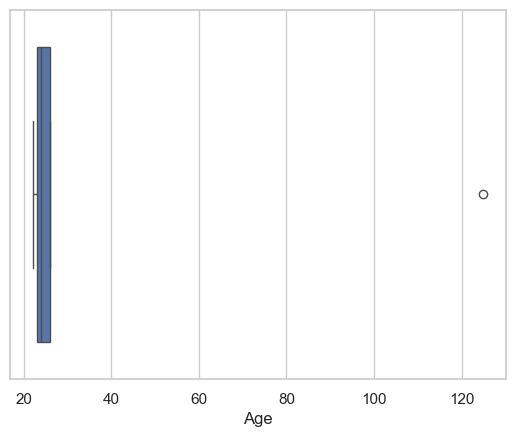

In [9]:
sns.boxplot(x='Age', data=df);

As you can see, there is a value far away from the rest. The age of 125 is probably a typo. We should verify it! As we cannot, we will replace it with a missing value. 

In [10]:
df['Age'] = df.Age.replace(125, np.nan)
df

,Name,Age,Sex,Score
0,John,26.0,MALE,85
1,Anna,23.0,female,31
2,Mary,23.0,_,55
3,Mary,23.0,F,55
4,Anna,23.0,Fem,31
5,Charles,24.0,M,77
6,John,26.0,male,85
7,Rob,24.0,M,63
8,Rob,22.0,M,63
9,John,26.0,Mal,85


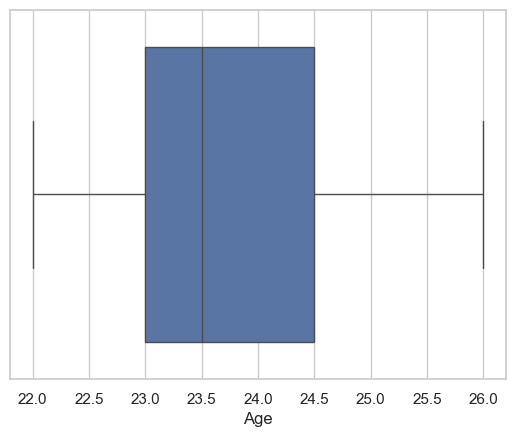

In [11]:
sns.boxplot(x='Age', data=df);

Notice that we could replace the `Age` missing value with the mode, mean, or any central tendency measure. Of course, the preferred option is to determine the actual value by checking the source. 

### Formatting the `Sex` variable

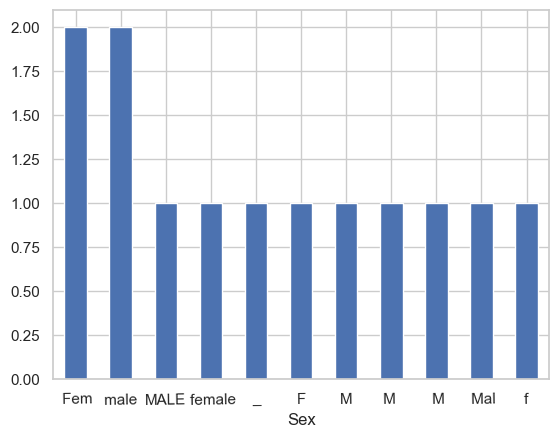

In [12]:
df.Sex.value_counts().plot(kind='bar', rot=True);

The values of the `Sex` variable is not homogeneous. Let's fix them!

In [13]:
# Extracting the values
sex = df.Sex
sex

0        MALE
1      female
2           _
3           F
4         Fem
5           M
6       male 
7         M  
8           M
9         Mal
10        Fem
11      male 
12         f 
Name: Sex, dtype: object

In [14]:
# Removing the extra spaces (left and right spaces)
sex = sex.str.strip()
sex

0       MALE
1     female
2          _
3          F
4        Fem
5          M
6       male
7          M
8          M
9        Mal
10       Fem
11      male
12         f
Name: Sex, dtype: object

In [15]:
# Converting to lower case
sex = sex.str.lower()
sex

0       male
1     female
2          _
3          f
4        fem
5          m
6       male
7          m
8          m
9        mal
10       fem
11      male
12         f
Name: Sex, dtype: object

In [16]:
# Getting only the first element: f for female and m for male
sex = pd.Series([s[0] for s in sex])
sex

0     m
1     f
2     _
3     f
4     f
5     m
6     m
7     m
8     m
9     m
10    f
11    m
12    f
dtype: object

So far, `sex` variable looks pretty good.

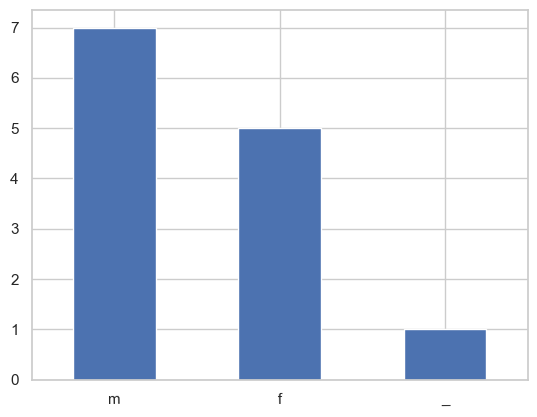

In [17]:
sex.value_counts().plot(kind='bar', rot=True);

As you can see, `_` is considered a valid value, but it is missing.

In [18]:
# Replacing _ for np.nan (missing value symbol)
sex[2] = np.nan
sex

0       m
1       f
2     NaN
3       f
4       f
5       m
6       m
7       m
8       m
9       m
10      f
11      m
12      f
dtype: object

In [19]:
df['Sex'] = sex
df

,Name,Age,Sex,Score
0,John,26.0,m,85
1,Anna,23.0,f,31
2,Mary,23.0,NaN,55
3,Mary,23.0,f,55
4,Anna,23.0,f,31
5,Charles,24.0,m,77
6,John,26.0,m,85
7,Rob,24.0,m,63
8,Rob,22.0,m,63
9,John,26.0,m,85


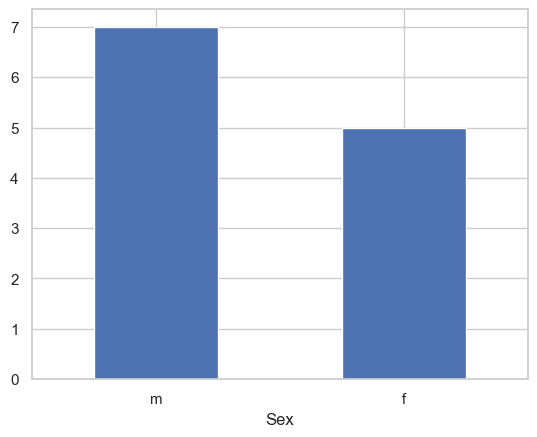

In [20]:
df.Sex.value_counts().plot(kind='bar', rot=True);

Notice that we could replace the `Sex` missing value with the mode, or we could guess based on the `Name` variable. Again, the preferred option is to determine the actual value by checking the source. 

### Fixing the `Score` variable

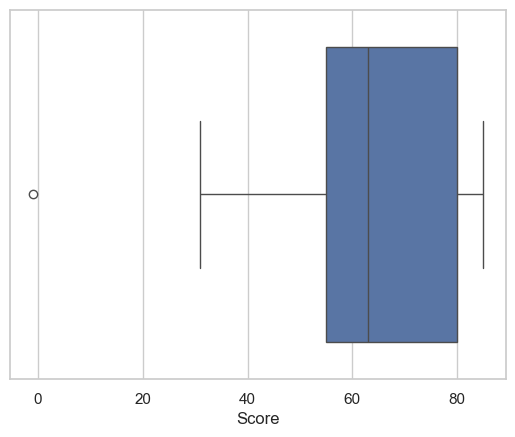

In [21]:
sns.boxplot(x=df.Score);

Let's replace the -1 value for np.nan (missing value symbol).

In [22]:
df.Score = df.Score.replace(-1, np.nan)
df

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
4,Anna,23.0,f,31.0
5,Charles,24.0,m,77.0
6,John,26.0,m,85.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
9,John,26.0,m,85.0


## Removing Duplicated Values

In [23]:
# We will work with the same DataFrame
df

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
4,Anna,23.0,f,31.0
5,Charles,24.0,m,77.0
6,John,26.0,m,85.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
9,John,26.0,m,85.0


## Dropping the duplicate rows

In [24]:
# drop duplicate rows
df.drop_duplicates()

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
5,Charles,24.0,m,77.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
10,Anna,23.0,f,NaN
12,Heather,NaN,f,80.0


Notice we are keeping the first occurrence of the duplicate rows. It is the default option.

In [25]:
# It produces the same result
df.drop_duplicates(keep='first')

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
5,Charles,24.0,m,77.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
10,Anna,23.0,f,NaN
12,Heather,NaN,f,80.0


In [26]:
# drop_duplicates does not affect the original DataFrame
df

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
4,Anna,23.0,f,31.0
5,Charles,24.0,m,77.0
6,John,26.0,m,85.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
9,John,26.0,m,85.0


In [27]:
# Drop duplicate rows, keeping the last occurrence of each row
df.drop_duplicates(keep='last')

,Name,Age,Sex,Score
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
4,Anna,23.0,f,31.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
9,John,26.0,m,85.0
10,Anna,23.0,f,NaN
11,Charles,24.0,m,77.0
12,Heather,NaN,f,80.0


Suppose now we want to penalize the duplicated cases, removing them from the DataFrame. If we find a duplicated row, we will drop both from the DataFrame.

In [28]:
# Delete all duplicate rows from the DataFrame
df.drop_duplicates(keep=False)

,Name,Age,Sex,Score
2,Mary,23.0,NaN,55.0
3,Mary,23.0,f,55.0
7,Rob,24.0,m,63.0
8,Rob,22.0,m,63.0
10,Anna,23.0,f,NaN
12,Heather,NaN,f,80.0


In [29]:
# drop duplicate by a column name
df.drop_duplicates(['Name'])

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
5,Charles,24.0,m,77.0
7,Rob,24.0,m,63.0
12,Heather,NaN,f,80.0


We did not use the `keep` parameter, so it will use the default value: `keep="first"`.

In [30]:
# drop duplicate by a column name
df.drop_duplicates(['Name'], keep='last')

,Name,Age,Sex,Score
3,Mary,23.0,f,55.0
8,Rob,22.0,m,63.0
9,John,26.0,m,85.0
10,Anna,23.0,f,NaN
11,Charles,24.0,m,77.0
12,Heather,NaN,f,80.0


We used the parameter `keep="last"`

Notice it kept the row 8 with `Rob 22 m 63.0` instead of the row 7 `Rob 24.0 m 63.0`

The two rows with the name Rob could refer to the same person or not. We should check the source to decide what to do.

In [31]:
# inplace=True will affect the original DataFrame
df.drop_duplicates(['Name'], inplace=True)
df

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
5,Charles,24.0,m,77.0
7,Rob,24.0,m,63.0
12,Heather,NaN,f,80.0


In [32]:
# reseting the indexes
df.drop_duplicates(ignore_index=True, inplace=True)
df

,Name,Age,Sex,Score
0,John,26.0,m,85.0
1,Anna,23.0,f,31.0
2,Mary,23.0,NaN,55.0
3,Charles,24.0,m,77.0
4,Rob,24.0,m,63.0
5,Heather,NaN,f,80.0


## Conclusions

Key Takeaways:
- Standardizing text formats and correcting capitalization enhances data uniformity, facilitating better analysis and comparison.
- Addressing outliers in numerical data, such as ages, is crucial, mainly when values fall outside plausible ranges.
- Converting categorical data into a uniform format ensures accurate categorization and analysis.
- Removing duplicate records helps maintain the dataset's uniqueness, which is crucial for analyses that assume independent observations.
- Data cleaning processes, including removing duplicates and standardizing fields, are essential steps before conducting any further analysis or data modeling to ensure the accuracy and reliability of the results.

## References

- Camm, et. al. (2015) Essentials of Business Analytics, Cengage Learning, USA